<a href="https://colab.research.google.com/github/ssumannb/ML_Scientist_with_Python/blob/main/1_Supervised_learning_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Classification
##Supervised learning
* The predicted values are known
* Aim: Predict the target values of unseend ata, given the features

#### Types of supervised learning
* classification : Target variable consists of categories
* regression : Target variable is continuous

#### Naming conventions
* Features = predictor variable = independent variable
* Target variable = dependent variable = response variable

#### Before you use supervised learning
* Requirements 
  * No missing values
  * Data in numeric format
  * Data stored in pandas DataFrame or Numpy array

* Perform Exploratory Data Analysis (EDA) first


### Scikit-learn syntax
#### Classifying label of unseen data
1. Build a model
2. Model learns from the labeled data we pass to it
3. Pass unlabeled data to the model as input
4. Model predicts the label of the unseen data

#####k-Nearest Neighbors
k-Nearest Neighbors is popular for classification problems.  
It is to predict the label of any data point by looking at the **k closest labeled data points and getting them to vote** on what label the unlabeled observation should have.  



In [ ]:
using scikit-learn to fit a classifier
from sklearn.neighbors import KNeighborsClassifier

# 2 features, 3333 observations of 2 features
X = churn_df[['total_day_charge', 'total_eve_charge']].values   # 2D array
y = churn_df['churn'].values    # 1D array

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]]) # shape = (3, 2)

predictions = knn.predict(X_new)

#### Measuring model performance
* in classification, **accuracy** is commonly used metric



In [ ]:
from sklearn.model_selection import train_test_split

# random_state parameter : set the random seed which split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state = 21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


#### Model complexity
* Larger k = less complex model = can cause under fitting
* Smaller k = more complex model = can lead to overfitting

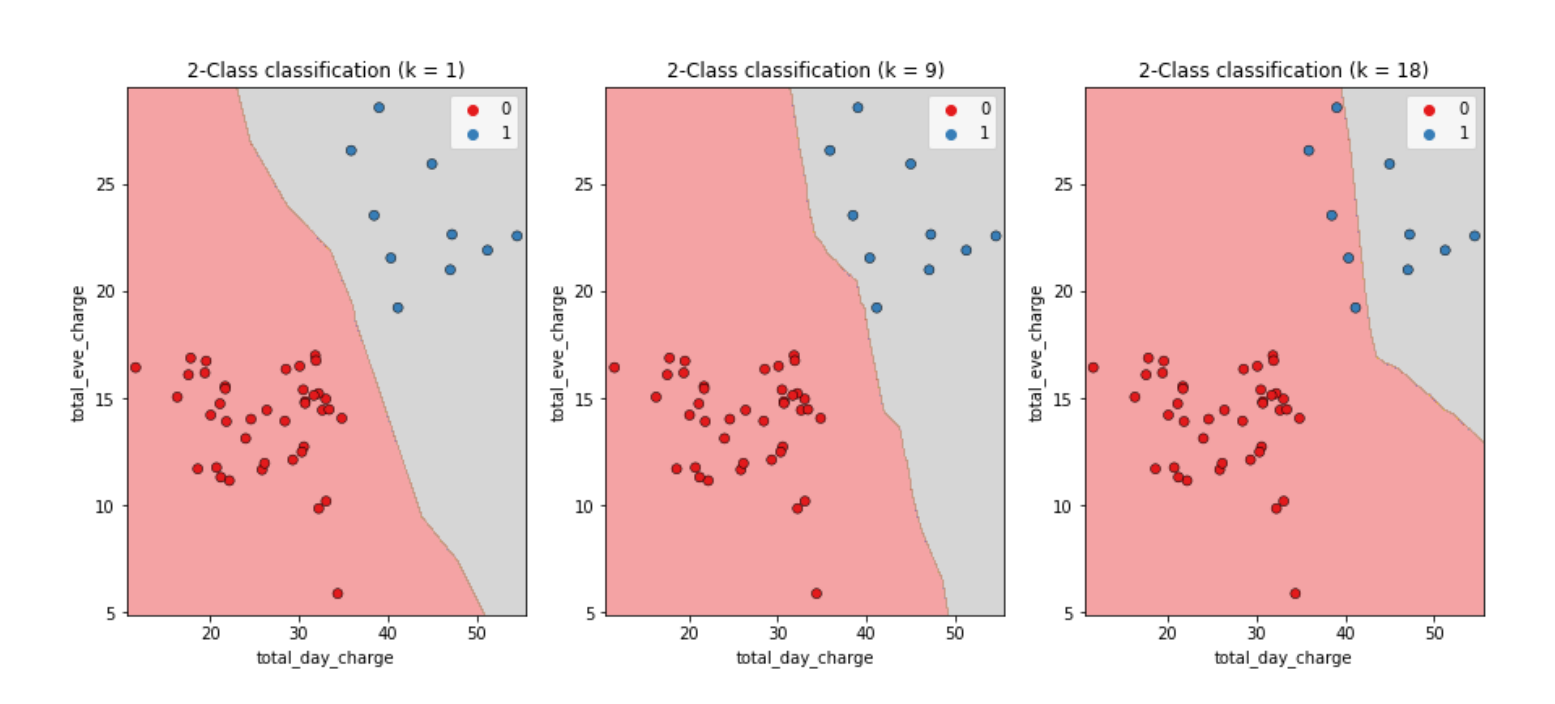




In [ ]:
# plotting model complexity curve

train_accuracies = {}  # defined dictionary type
test_accuracies = {}

neighbors = np.arange(1, 26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


Model complexity curve 
results: 
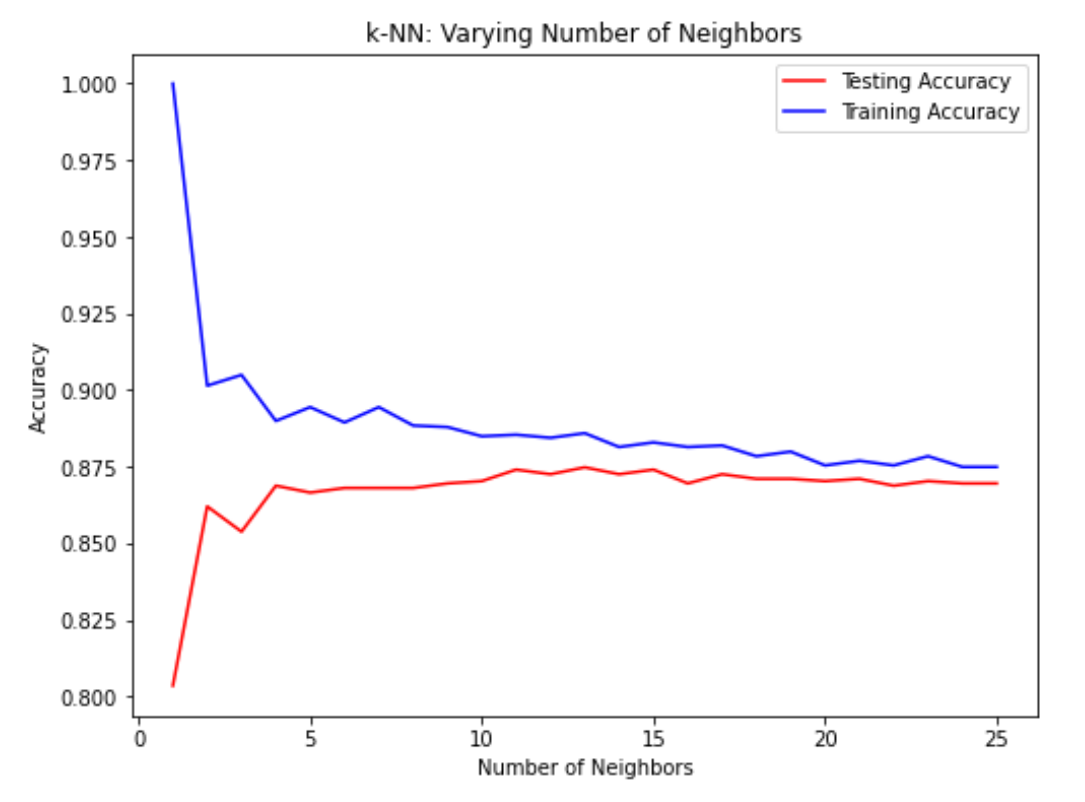

As 'k' increases beyond 15 we see overfitting where performance plateaus on both test and training sets, as indicated in this plots


# 2. Regression
In regression tasks, target variable typically has continuous values  

Creating features and target arrays

In [ ]:
X = diabets_df.drop("glucose", axis=1).values
y = diabets_df['glucose'].values

print(type(X), type(y))
# <class 'numpy.ndarray'> <class 'numpy.ndarray'>

Making predictions from a sinlge feature  
* y.shape, X_bmi.shape is 1-dimensional arrays. **This is fine for y, but our features must be formatted as 2-dimensional array to be accepted by scikit-learn.**  
* to convert the shape of X_bmi we apply Numpy's dot-reshape method : passing -1 followed by 1
  
* reshaped X_bmi (752, 1) is now correct shape for our model 


In [ ]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)
# (752, )(752, )

X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)
# (752, 1)

Plotting glucose vs. body mass index

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

Fitting a regression model prediction and plotting

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plt(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

